<a href="https://colab.research.google.com/github/rkdwlals37/pdm01/blob/main/notebook/chap09_CNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 
- Conv2D
- MaxPooling2D

## mnist model

In [ ]:
# Conv2D & MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers


input_shape = (4, 28, 28, 3)# 배치사이즈 , 28,28 이미지 , rgb
x = tf.random.normal(input_shape) # 4차원배열 데이터를 무작위값으로바꿈
y = layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
 # 2는 컨볼루션 뉴련의 개수 3은 필터의구조 3,3 이된다.  
print(y.shape) #결과가 패딩을 valid 패딩이라 값이 줄어들게나온다.(4, 26, 26, 2) 마지막 2는 배치의 개수
# padding = 'same' 원래패딩대로하면 값이 그대로나옴
x = tf.random.normal(input_shape) 
y = layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:], padding = 'same' )(x)
print(y.shape)

#number of filters
x = tf.random.normal(input_shape) # 4차원배열 데이터를 무작위값으로바꿈
y = layers.Conv2D(32, 3, activation='relu', input_shape=input_shape[1:], padding = 'same' )(x)
print(y.shape)


input_shape = (100, 64, 64, 3)
x = tf.random.normal(input_shape)
y = layers.Conv2D(128, 5, activation='relu', padding="same", 
			input_shape=input_shape[1:])(x)
print(y.shape)

#Pooling 커진값을 줄이는것
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])#인풋데이터 1 데이터3,3 ,채널 1
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='valid')
print(max_pool_2d(x))
# padding = 'same' 패딩은 오른쪽 아래
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])#인풋데이터 1 데이터3,3 ,채널 1
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='same')
print(max_pool_2d(x))



(4, 26, 26, 2)
(4, 28, 28, 2)
(4, 28, 28, 32)
(100, 64, 64, 128)
tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)
tf.Tensor(
[[[[5.]
   [6.]
   [6.]]

  [[8.]
   [9.]
   [9.]]

  [[8.]
   [9.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


## CNN - mnist

In [ ]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)


In [ ]:
# Model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

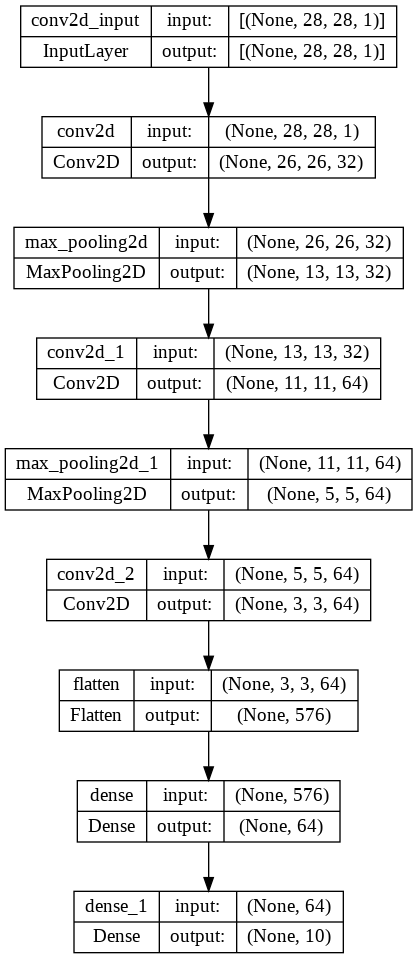

In [ ]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(train_images, train_labels, epochs=5)

#
# [DIY] test 데이터에 모델 적용하고 정확도 계산
#
model.evaluate(test_images, test_labels) 


Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1468 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9902


[0.03176434710621834, 0.9901999831199646]